# Exploring the BIG5 dataset from the [Open-Source Psychometrics Project](https://openpsychometrics.org/)



In [35]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [36]:
big5_df = pd.read_csv('data/openpsych_data.csv', sep='\t')

In [37]:
big5_df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='str')

In [38]:
big5_df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


### `race`
Chosen from a drop down menu. 
```
1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)
```

In [39]:
race_values = '''1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 
4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 
7=Indigenous Australian, 8=Native American, 
9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 
10=Pacific (Polynesian, Micronesian, etc), 
11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other, 0=missed
'''

parts = re.split(r'(?:,\s+)?([0-9]+)=', race_values.strip())

race_keys = [int(key_val) for key_val in parts[1::2]]
race_values = parts[2::2]

In [40]:
race_mapping = dict(zip(race_keys,race_values))
race_mapping

{1: 'Mixed Race',
 2: 'Arctic (Siberian, Eskimo)',
 3: 'Caucasian (European)',
 4: 'Caucasian (Indian)',
 5: 'Caucasian (Middle East)',
 6: 'Caucasian (North African, Other)',
 7: 'Indigenous Australian',
 8: 'Native American',
 9: 'North East Asian (Mongol, Tibetan, Korean Japanese, etc)',
 10: 'Pacific (Polynesian, Micronesian, etc)',
 11: 'South East Asian (Chinese, Thai, Malay, Filipino, etc)',
 12: 'West African, Bushmen, Ethiopian',
 13: 'Other',
 0: 'missed'}

In [41]:
big5_df=big5_df.assign(race_cat=big5_df['race'].map(race_mapping))

In [42]:
(big5_df['race_cat'].value_counts()

SyntaxError: incomplete input (3256161567.py, line 1)

### `age`

age	entered as text (individuals reporting age < 13 were not recorded)


In [43]:
big5_df['age'].max()

np.int64(999999999)

In [44]:
big5_df['age'].value_counts().tail(50)

age
68           20
67           19
69           15
70           12
71           11
1992          9
72            8
1994          8
1996          7
1995          5
1993          5
75            5
1989          5
1997          4
1982          4
1998          4
1991          3
1990          3
77            3
188           2
1976          2
1984          2
74            2
76            2
73            2
1986          2
79            2
1985          2
1999          1
1988          1
100           1
208           1
999999999     1
1961          1
1977          1
412434        1
92            1
2000          1
80            1
1974          1
97            1
1968          1
211           1
223           1
99            1
266           1
191           1
78            1
1964          1
118           1
Name: count, dtype: int64

In [45]:
big5_dfbig5_df['age']>100]['age'].value_counts()

SyntaxError: unmatched ']' (4158236042.py, line 1)

### `gender`
gender	Chosen from a drop down menu. 1=Male, 2=Female, 3=Other (0=missed)



In [46]:
gender_map = {
    0: pd.NA,
    1: 'male',
    2: 'female',
    3: 'other'
}

In [47]:
big5_df['gender'].value_counts()

gender
2    11985
1     7608
3      102
0       24
Name: count, dtype: int64

In [48]:
big5_df=big5_df.assign(gender_cat=big5_df['gender'].map(gender_map))

In [49]:
big5_df['gender_cat'].value_counts()

gender_cat
female    11985
male       7608
other       102
Name: count, dtype: int64

### `hand`

hand	"What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)


In [50]:
big5_df['hand'].value_counts()

hand
1    17424
2     1724
3      471
0      100
Name: count, dtype: int64

### `source`

How the participant came to the test. Based on HTTP Referer. 1=from another page on the test website, 2=from google, 3=from facebook, 4=from any url with ".edu" in its domain name (e.g. xxx.edu, xxx.edu.au), 6=other source, or HTTP Referer not provided.

In [51]:
big5_df['source'].value_counts()

source
1    12099
2     3653
5     3527
3      303
4      137
Name: count, dtype: int64

### `country`

The participant's technical location. ISO country code.

In [52]:
big5_df['country'].value_counts().head(20)

country
US     8753
GB     1531
IN     1464
AU      974
CA      924
PH      649
(nu     369
IT      277
MY      247
PK      222
DE      191
ZA      179
BR      175
ID      172
SE      169
NZ      157
NO      147
RO      135
SG      133
NL      133
Name: count, dtype: int64

In [53]:
big5_df['country'].nunique()

158

---

## Scoring

* https://ipip.ori.org/newScoringInstructions.htm

> Here is how to score IPIP scales:
>
> For + keyed items, the response "Very Inaccurate" is assigned a value of 1, "Moderately Inaccurate" a value of 2, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 4, and "Very Accurate" a value of 5.
>
> For - keyed items, the response "Very Inaccurate" is assigned a value of 5, "Moderately Inaccurate" a value of 4, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 2, and "Very Accurate" a value of 1.
>
> Once numbers are assigned for all of the items in the scale, just sum all the values to obtain a total scale score.


---

### Keyed items

https://ipip.ori.org/new_ipip-50-item-scale.htm

In [54]:
questions = '''
E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings.
N9	I get irritated easily.
N10	I often feel blue.
A1	I feel little concern for others.
A2	I am interested in people.
A3	I insult people.
A4	I sympathize with others' feelings.
A5	I am not interested in other people's problems.
A6	I have a soft heart.
A7	I am not really interested in others.
A8	I take time out for others.
A9	I feel others' emotions.
A10	I make people feel at ease.
C1	I am always prepared.
C2	I leave my belongings around.
C3	I pay attention to details.
C4	I make a mess of things.
C5	I get chores done right away.
C6	I often forget to put things back in their proper place.
C7	I like order.
C8	I shirk my duties.
C9	I follow a schedule.
C10	I am exacting in my work.
O1	I have a rich vocabulary.
O2	I have difficulty understanding abstract ideas.
O3	I have a vivid imagination.
O4	I am not interested in abstract ideas.
O5	I have excellent ideas.
O6	I do not have a good imagination.
O7	I am quick to understand things.
O8	I use difficult words.
O9	I spend time reflecting on things.
O10	I am full of ideas.
'''


In [55]:
big5_questions_df = pd.DataFrame([item.split('\t') for item in questions.splitlines() if item>''])

In [56]:
big5_questions_df

,0,1
0,E1,I am the life of the party.
1,E2,I don't talk a lot.
2,E3,I feel comfortable around people.
3,E4,I keep in the background.
4,E5,I start conversations.
5,E6,I have little to say.
6,E7,I talk to a lot of different people at parties.
7,E8,I don't like to draw attention to myself.
8,E9,I don't mind being the center of attention.
9,E10,I am quiet around strangers.


---

### Questions and direction key

https://ipip.ori.org/new_ipip-50-item-scale.htm

In [57]:
factor_map = { 1: 'E', 
               2: 'A',
               3: 'C',
               4: 'N',
               5: 'O' }

In [58]:
ipip_df = pd.read_html('big5_questions.html', header=0)[0]
ipip_df = ipip_df.rename(columns={'Unnamed: 1': 'text', 'Unnamed: 7': 'factor_and_direction'})[['text','factor_and_direction']]
ipip_df[['factor','direction']]=ipip_df['factor_and_direction'].str.extract(r'([1-5])(.)')
ipip_df['category']=ipip_df['factor'].astype(int).map(factor_map)

In [59]:
ipip_df = ipip_df.assign(number=np.repeat(np.arange(1,11),5))
ipip_df = ipip_df.assign(qcode=ipip_df['category'].str.cat(ipip_df['number'].astype(str)))   

In [60]:
neg_items = ipip_df.query('direction=="-"')['qcode']
neg_items

1      A1
3      N1
5      E2
7      C2
9      O2
11     A3
13     N3
15     E4
17     C4
19     O4
21     A5
23     N5
25     E6
27     C6
28     N6
29     O6
31     A7
33     N7
35     E8
37     C8
38     N8
43     N9
45    E10
48    N10
Name: qcode, dtype: str

* Make a copy of the original dataframe to keep available in case of mistakes

In [61]:
big5_scored_df = big5_df.copy()

* Reverse code the `negatively` keyed items

In [62]:
big5_scored_df[neg_items] = 6-big5_df[neg_items]

In [63]:
E_cols = [f'E{n+1}' for n in range(10)]
E_cols

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']

In [64]:
cat_cols = {
    cat : [f'{cat}{n+1}' for n in range(10)] 
    for cat in ('O','C','E','A','N') 
}

In [65]:
cat_cols

{'O': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'],
 'A': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']}

In [66]:
for cat, cols in cat_cols.items():
    big5_scored_df[cat]=big5_scored_df[cols].sum(axis=1)

In [67]:
big5_scored_df[['O','C','E','A','N']]

,O,C,E,A,N
0,43,47,44,46,49
1,26,42,22,35,29
2,45,49,35,38,14
3,41,26,22,37,17
4,34,34,34,44,30
...,...,...,...,...,...
19714,35,36,21,42,19
19715,30,32,25,36,39
19716,37,23,21,26,10
19717,42,43,21,38,20


In [68]:
gender_dist_df = (
    big5_scored_df.
        groupby('gender_cat')[['O','C','E','A','N']].
        agg('mean').
        round(1)
)

gender_dist_df

,O,C,E,A,N
gender_cat,,,,,
female,38.6,33.6,30.5,39.7,27.9
male,39.9,33.2,29.5,36.5,30.9
other,41.5,31.4,24.3,35.3,25.9


<Axes: >

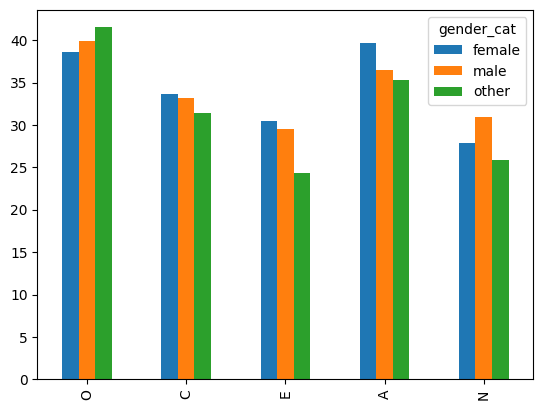

In [69]:
gender_dist_df.transpose().plot(kind='bar')

In [70]:
gender_dist_df.transpose()

gender_cat,female,male,other
O,38.6,39.9,41.5
C,33.6,33.2,31.4
E,30.5,29.5,24.3
A,39.7,36.5,35.3
N,27.9,30.9,25.9


In [71]:
india_df = 

SyntaxError: invalid syntax (2577501113.py, line 1)

In [ ]:
india_df.shape

In [ ]:
(
    big5_scored_df.query('country in ["US","GB","IN","AU","CA"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

In [ ]:
 big5_scored_df.query('country=="IN"').shape

In [ ]:
big5_scored_df.query('country in ["US","GB"]')